In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data setimizi numpy kullanarak işlemlerimizde kullanacak data şekline çeviriyoruz
# ilk satırı atlamamızın sebebi data sette ilk satırda column isimlerinin olması
data = np.loadtxt("Student_performance.csv", delimiter=";", skiprows=1)

In [3]:
# X değerleri 'performance' hariç tüm feature'lar
X = data.astype(int)[:, :4]  
# y değerlerimiz yani 'performance' değerleri datasetimizin 4. sütununda bulunuyor
y = data.astype(int)[:, 4] 

In [4]:
# datalarımızı normalize etmediğimizde grafiğimiz istediğimiz gibi olmamakta
# bu yüzden datamız üzerinde işlemler yapmadan önce feature normalization(Z-Score) işlemi gerçekleştiriyoruz
# normalizasyon yapmadan direkt data üzerinden işlem yapmak istediğimde cost değerleri olarak NaN veya inf 
# değerler çıkmakta learning rate'i 0.0001 yaptığımızda düzgün değerlerle karşılaşabiliyoruz ancak
# ödevin 4. maddesinde de yine aynı şekilde çok küçük değerler seçmek zorunda kaldığımdan dataseti üzerinde
# işlem yapmadan önce normalizasyon yapmak istedim
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train, mu, sigma = featureNormalize(X)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

In [5]:
def computeCostMulti(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

In [6]:
# kendi seçmiş olduğum 5 farklı itearasyon değeri
my_iteration_values = [100, 250, 500, 1000, 1500]
# her bir iterasyon değeri için cost değerinin saklanacağı liste
cost_values = {}

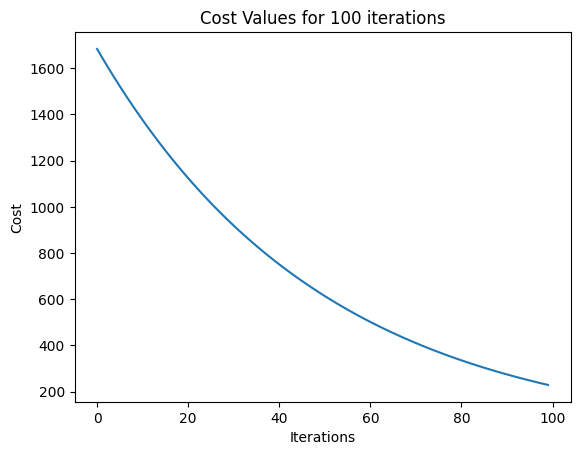

100 İteasyon, Cost Değeri:  229.35422858431477


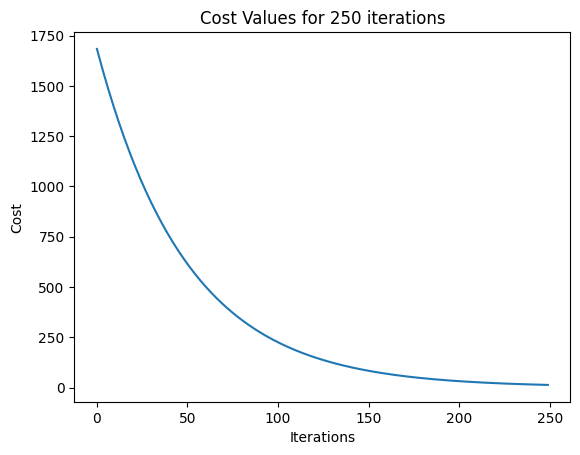

250 İteasyon, Cost Değeri:  12.916489482350688


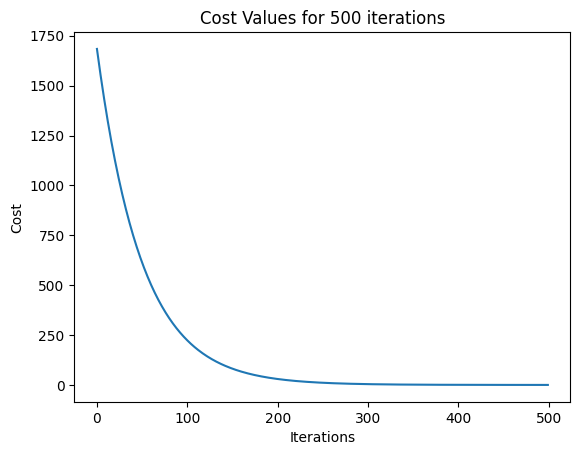

500 İteasyon, Cost Değeri:  1.9532641377145847


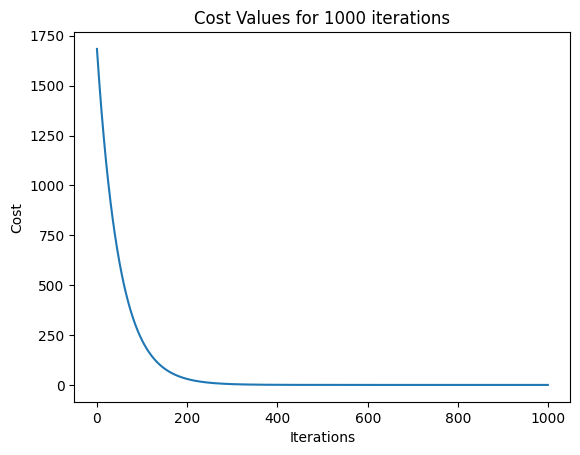

1000 İteasyon, Cost Değeri:  1.881054448346966


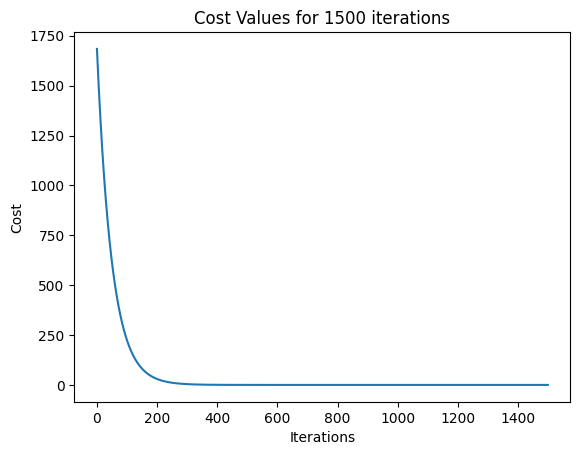

1500 İteasyon, Cost Değeri:  1.8810511273641128


In [7]:
plt.figure()
for i in my_iteration_values:
    theta = np.zeros(5)
    alpha = 0.01
    theta, J_history = gradientDescentMulti(X_train, y, theta, alpha, i)
    plt.title(f"Cost Values for {i} iterations")
    plt.plot(np.arange(i), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    print(f"{i} İteasyon, Cost Değeri:  {computeCostMulti(X_train, y, theta)}")
    cost_values[i] = (computeCostMulti(X_train, y, theta))

In [8]:
# grafiklere göre en iyi iterasyon değerinin 1500 görülmekte
best_iteration_value = 1500

In [9]:
# kendi seçmiş olduğum 3 farklı alpha (learning rate) değeri
alphas = [0.005, 0.001, 0.01]

0.005 alpha değeri için Cost:  1.88155212949036
0.001 alpha değeri için Cost:  85.93369593593486
0.01 alpha değeri için Cost:  1.8810511273641128


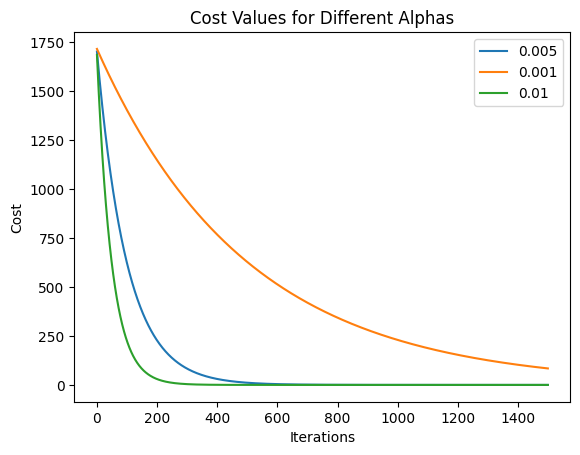

In [10]:
plt.figure()
for alpha in alphas:
    theta = np.zeros(5)
    theta, J_history = gradientDescentMulti(X_train, y, theta, alpha, best_iteration_value)
    plt.plot(np.arange(best_iteration_value), J_history, label=str(alpha))
    print(f"{alpha} alpha değeri için Cost:  {computeCostMulti(X_train, y, theta)}")
plt.title("Cost Values for Different Alphas")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [11]:
# grafiklere göre en iyi alpha değeri 0.01
best_alpha_value = 0.01

MİN-MAX Normalizasyonu için Cost: 11.179158762880624


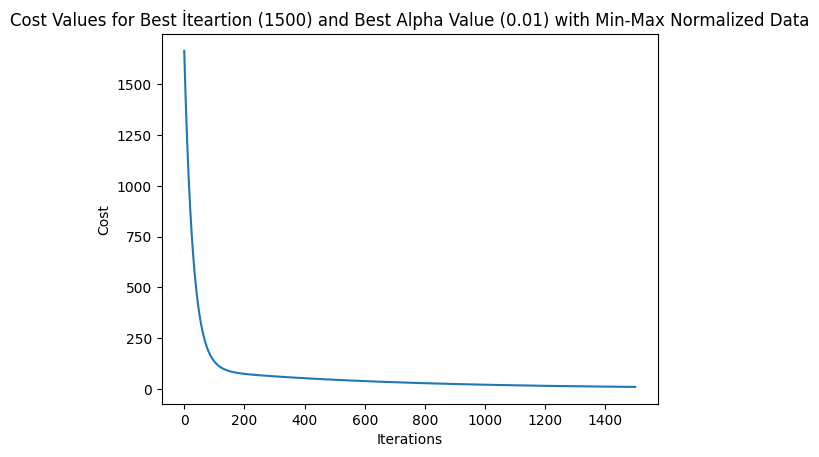

In [12]:
# min - max normalizasyonu
def min_max_scaler(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_minmax = min_max_scaler(X_train)

theta = np.zeros(5)
theta, J_history = gradientDescentMulti(data_minmax, y, theta, best_alpha_value, best_iteration_value)
print(f"MİN-MAX Normalizasyonu için Cost: {computeCostMulti(data_minmax, y, theta)}")
plt.title(f"Cost Values for Best İteartion ({best_iteration_value}) and Best Alpha Value ({best_alpha_value}) with Min-Max Normalized Data")
plt.plot(np.arange(best_iteration_value), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

L2 Normalizasyonu için Cost: 76.12268931493102


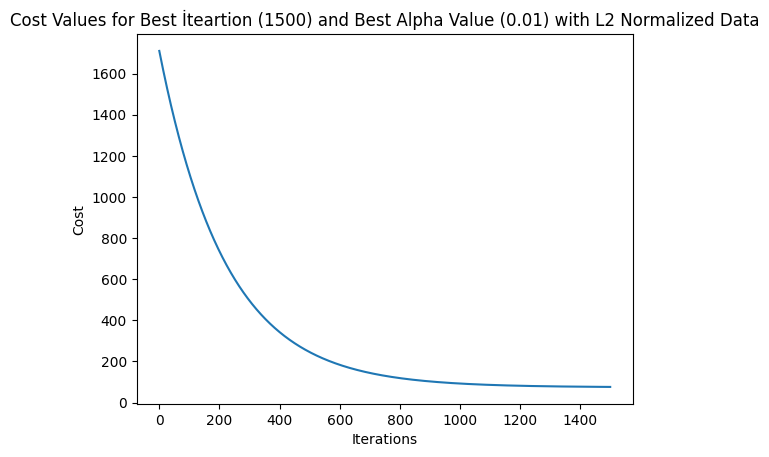

In [13]:
# L2 normalizasyonu
def l2_normalizer(data):
    norm = np.linalg.norm(data, axis=1, keepdims=True)
    return data / norm

data_l2_normalized = l2_normalizer(X_train)

theta = np.zeros(5)
theta, J_history = gradientDescentMulti(data_l2_normalized, y, theta, best_alpha_value, best_iteration_value)
print(f"L2 Normalizasyonu için Cost: {computeCostMulti(data_l2_normalized, y, theta)}")
plt.title(f"Cost Values for Best İteartion ({best_iteration_value}) and Best Alpha Value ({best_alpha_value}) with L2 Normalized Data")
plt.plot(np.arange(best_iteration_value), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [14]:
# Bu data setinde aynı alpha ve aynı iterasyon değerlerinde 
# min-max normalizasyonu L2 normalizasyonuna göre daha az maliyetli oldu